In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleAutomotiveCtf-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/automotive_ctf_dql/plots"

In [5]:
# Parameters
gymid = "CyberBattleAutomotiveCTF-v0"
env_size = None
iteration_count = 200
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 32
maximum_total_credentials = 10
plots_dir = "notebooks/output/automotive_ctf_dql/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

In [8]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=20,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

/mnt/c/Users/cabin/git_repo/CyberSecurity-LLM/src/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:   46.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:   46.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:   60.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:   60.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:   66.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:   66.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:   66.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:   75.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:   75.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:   81.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:   81.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:   87.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:   87.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 166|reward:  127.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 166|reward:  127.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  127.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  141.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  141.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  141.0|last_reward_at:  184|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/11 (0.31)
    explore-remote: 5/90 (0.05)
    explore-connect: 1/76 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 0/10 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 2/20 'DQL' ϵ=0.8688, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   25.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   25.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:   36.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:   49.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:   49.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:   62.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:   62.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   68.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   68.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:   68.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:   74.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:   74.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:   80.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:   80.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:   80.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:   94.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:   94.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:   94.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 180|reward:   94.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:   94.0|last_reward_at:  117|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/9 (0.25)
    explore-remote: 5/77 (0.06)
    explore-connect: 0/89 (0.00)
    exploit-local: 1/2 (0.33)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 0/12 (0.00)
  exploit deflected to exploration: 9
  ## Episode: 3/20 'DQL' ϵ=0.8386, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:   11.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:   22.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:   47.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:   61.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:   61.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:   61.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:   61.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:   61.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:   67.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:   67.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 99|reward:   73.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 99|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 125|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 132|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 150|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:   73.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 3|Iteration 158|reward:  113.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 3|Iteration 158|reward:  113.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 160|reward:  127.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 160|reward:  127.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 170|reward:  127.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 178|reward:  127.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 185|reward:  127.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 193|reward:  127.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 200|reward:  127.0|last_reward_at:  160|Elapsed Time: 0:00:01||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/6 (0.40)
    explore-remote: 3/91 (0.03)
    explore-connect: 0/68 (0.00)
    exploit-local: 1/16 (0.06)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/10 (0.09)
  exploit deflected to exploration: 10
  ## Episode: 4/20 'DQL' ϵ=0.8097, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   11.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:   31.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:   44.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:   44.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:   44.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:   44.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:   84.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:   84.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:   98.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:   98.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  109.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  109.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  122.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 137|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 145|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 155|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 4|Iteration 170|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 4|Iteration 180|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 4|Iteration 185|reward:  128.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 4|Iteration 185|reward:  128.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 4|Iteration 189|reward:  134.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 4|Iteration 189|reward:  134.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 4|Iteration 198|reward:  134.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 4|Iteration 200|reward:  134.0|last_reward_at:  189|Elapsed Time: 0:00:01||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 4/82 (0.05)
    explore-connect: 0/66 (0.00)
    exploit-local: 2/19 (0.10)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/16 (0.06)
  exploit deflected to exploration: 5
  ## Episode: 5/20 'DQL' ϵ=0.7819, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   37.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   37.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:   37.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:   77.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:   77.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   77.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:   90.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:   90.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:   90.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:   90.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  104.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 117|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 127|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 147|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 168|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 175|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 183|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 193|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 200|reward:  104.0|last_reward_at:   72|Elapsed Time: 0:00:01||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 2/68 (0.03)
    explore-connect: 0/80 (0.00)
    exploit-local: 2/14 (0.12)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 1/18 (0.05)
  exploit deflected to exploration: 6
  ## Episode: 6/20 'DQL' ϵ=0.7551, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 43|reward:   71.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 43|reward:   71.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 6|Iteration 44|reward:   85.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 6|Iteration 44|reward:   85.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:   96.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:   96.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 56|reward:   96.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:   96.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 74|reward:   96.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 82|reward:   96.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  104.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  104.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 97|reward:  104.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 104|reward:  110.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 104|reward:  110.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 6|Iteration 112|reward:  110.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 6|Iteration 113|reward:  124.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 6|Iteration 113|reward:  124.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  124.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:  124.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 140|reward:  124.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 150|reward:  124.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 160|reward:  124.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 6|Iteration 168|reward:  124.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 6|Iteration 170|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 6|Iteration 170|reward:  137.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 6|Iteration 180|reward:  137.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 6|Iteration 188|reward:  137.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 6|Iteration 198|reward:  137.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 6|Iteration 200|reward:  137.0|last_reward_at:  170|Elapsed Time: 0:00:01||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 4/64 (0.06)
    explore-connect: 1/71 (0.01)
    exploit-local: 2/17 (0.11)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 0/15 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 7/20 'DQL' ϵ=0.7294, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   60.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   60.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:   74.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 87|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 97|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 107|reward:   74.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 110|reward:   85.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 110|reward:   85.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 119|reward:   85.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 122|reward:   98.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 122|reward:   98.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 7|Iteration 126|reward:  111.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 7|Iteration 126|reward:  111.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 7|Iteration 137|reward:  111.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 7|Iteration 147|reward:  111.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 7|Iteration 155|reward:  111.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 7|Iteration 165|reward:  111.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 7|Iteration 172|reward:  125.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 7|Iteration 172|reward:  125.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 7|Iteration 183|reward:  125.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 7|Iteration 193|reward:  125.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 7|Iteration 200|reward:  125.0|last_reward_at:  172|Elapsed Time: 0:00:01||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 2/69 (0.03)
    explore-connect: 0/71 (0.00)
    exploit-local: 4/27 (0.13)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 1/9 (0.10)
  exploit deflected to exploration: 1
  ## Episode: 8/20 'DQL' ϵ=0.7047, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   71.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   71.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:   71.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:   85.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:   85.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:   85.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:   85.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 59|reward:   85.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:   96.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:   96.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:   96.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 83|reward:  109.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 83|reward:  109.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 8|Iteration 89|reward:  109.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  109.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  109.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  120.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  120.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 113|reward:  134.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 113|reward:  134.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 122|reward:  134.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  134.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 137|reward:  134.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 143|reward:  147.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 143|reward:  147.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward:  155.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 8|Iteration 152|reward:  155.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 8|Iteration 163|reward:  155.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 8|Iteration 173|reward:  155.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 8|Iteration 179|reward:  161.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 8|Iteration 179|reward:  161.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 8|Iteration 188|reward:  161.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 8|Iteration 198|reward:  161.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 8|Iteration 200|reward:  161.0|last_reward_at:  179|Elapsed Time: 0:00:01||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/5 (0.50)
    explore-remote: 5/59 (0.08)
    explore-connect: 1/72 (0.01)
    exploit-local: 0/22 (0.00)
    exploit-remote: 1/24 (0.04)
    exploit-connect: 0/6 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 9/20 'DQL' ϵ=0.6810, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:   54.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:   68.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:   68.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:   68.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:   68.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:   79.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:   79.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:   85.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:   85.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:   85.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 62|reward:   96.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 62|reward:   96.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:   96.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:   96.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 87|reward:   96.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 97|reward:   96.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 107|reward:   96.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:   96.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 120|reward:  109.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 120|reward:  109.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  122.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  122.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 132|reward:  122.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 140|reward:  122.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 150|reward:  122.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 9|Iteration 157|reward:  122.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 9|Iteration 165|reward:  122.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 9|Iteration 169|reward:  128.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 9|Iteration 169|reward:  128.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 9|Iteration 178|reward:  128.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 9|Iteration 185|reward:  128.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 9|Iteration 193|reward:  128.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 9|Iteration 198|reward:  141.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 9|Iteration 198|reward:  141.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 9|Iteration 200|reward:  141.0|last_reward_at:  198|Elapsed Time: 0:00:01||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/1 (0.75)
    explore-remote: 4/74 (0.05)
    explore-connect: 0/54 (0.00)
    exploit-local: 2/30 (0.06)
    exploit-remote: 0/14 (0.00)
    exploit-connect: 1/17 (0.06)
  exploit deflected to exploration: 0
  ## Episode: 10/20 'DQL' ϵ=0.6583, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   54.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   54.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   68.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   68.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   68.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:   68.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   79.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   79.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:   79.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:   79.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:   79.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:   90.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:   90.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:   90.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 83|reward:   96.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 83|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 92|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 99|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 107|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 117|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 125|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 135|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 142|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 150|reward:   96.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 10|Iteration 155|reward:  104.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 10|Iteration 155|reward:  104.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 10|Iteration 165|reward:  104.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 10|Iteration 173|reward:  104.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 10|Iteration 180|reward:  104.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 10|Iteration 188|reward:  104.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 10|Iteration 195|reward:  104.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 10|Iteration 200|reward:  104.0|last_reward_at:  155|Elapsed Time: 0:00:01||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/65 (0.02)
    explore-connect: 1/67 (0.01)
    exploit-local: 4/18 (0.18)
    exploit-remote: 1/11 (0.08)
    exploit-connect: 0/28 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 11/20 'DQL' ϵ=0.6364, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   20.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:   55.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:   55.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 26|reward:   95.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 26|reward:   95.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  109.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  109.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:  109.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 45|reward:  115.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 45|reward:  115.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 11|Iteration 56|reward:  115.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 11|Iteration 58|reward:  126.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 11|Iteration 58|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 66|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 74|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 82|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 89|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 97|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 107|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 117|reward:  126.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 126|reward:  134.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 126|reward:  134.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 11|Iteration 135|reward:  134.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 11|Iteration 142|reward:  134.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 11|Iteration 150|reward:  134.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 11|Iteration 157|reward:  134.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 11|Iteration 165|reward:  134.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 11|Iteration 170|reward:  140.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 11|Iteration 170|reward:  140.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 11|Iteration 180|reward:  140.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 11|Iteration 190|reward:  140.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 11|Iteration 197|reward:  153.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 11|Iteration 197|reward:  153.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 11|Iteration 200|reward:  153.0|last_reward_at:  197|Elapsed Time: 0:00:01||

  Episode 11 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 5/56 (0.08)
    explore-connect: 0/61 (0.00)
    exploit-local: 3/31 (0.09)
    exploit-remote: 1/21 (0.05)
    exploit-connect: 1/15 (0.06)
  exploit deflected to exploration: 0
  ## Episode: 12/20 'DQL' ϵ=0.6153, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:   54.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:   54.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:   68.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:   68.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:   79.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:   79.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:   92.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:   92.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:   98.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:   98.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  109.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  109.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward:  109.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward:  109.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 48|reward:  122.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 48|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 56|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 61|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 66|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 74|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 82|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 87|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 92|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 96|reward:  133.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 96|reward:  133.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 12|Iteration 98|reward:  141.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 12|Iteration 98|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 12|Iteration 107|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 12|Iteration 114|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 12|Iteration 122|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 12|Iteration 130|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 137|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 142|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 150|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 155|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 163|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 170|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 178|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 185|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 193|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 12|Iteration 200|reward:  141.0|last_reward_at:   98|Elapsed Time: 0:00:01||

  Episode 12 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/44 (0.06)
    explore-connect: 0/53 (0.00)
    exploit-local: 4/35 (0.10)
    exploit-remote: 1/33 (0.03)
    exploit-connect: 1/19 (0.05)
  exploit deflected to exploration: 0
  ## Episode: 13/20 'DQL' ϵ=0.5951, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 49|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 52|reward:   71.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 52|reward:   71.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 13|Iteration 55|reward:   85.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 13|Iteration 55|reward:   85.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 13|Iteration 64|reward:   85.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 13|Iteration 71|reward:   85.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 13|Iteration 79|reward:   85.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 13|Iteration 80|reward:   98.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 13|Iteration 80|reward:   98.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 13|Iteration 85|reward:  109.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 13|Iteration 85|reward:  109.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 94|reward:  109.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 102|reward:  109.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 109|reward:  109.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 114|reward:  109.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 119|reward:  109.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 125|reward:  109.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 130|reward:  122.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 13|Iteration 130|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 140|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 147|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 155|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 160|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 168|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 175|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 183|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 190|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 198|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 13|Iteration 200|reward:  122.0|last_reward_at:  130|Elapsed Time: 0:00:01||

  Episode 13 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/54 (0.02)
    explore-connect: 0/61 (0.00)
    exploit-local: 4/51 (0.07)
    exploit-remote: 1/20 (0.05)
    exploit-connect: 1/3 (0.25)
  exploit deflected to exploration: 0
  ## Episode: 14/20 'DQL' ϵ=0.5757, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   20.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 28|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward:   31.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 44|reward:   31.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 46|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 46|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 14|Iteration 48|reward:   50.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 14|Iteration 48|reward:   50.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 14|Iteration 56|reward:   50.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 14|Iteration 63|reward:   56.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 14|Iteration 63|reward:   56.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:   56.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 79|reward:   56.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 89|reward:   56.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 99|reward:   56.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 103|reward:   69.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 103|reward:   69.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 14|Iteration 114|reward:   69.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 14|Iteration 122|reward:   69.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 14|Iteration 130|reward:   69.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 14|Iteration 135|reward:   80.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 14|Iteration 135|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 14|Iteration 145|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 14|Iteration 155|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 14|Iteration 165|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 14|Iteration 173|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 14|Iteration 180|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 14|Iteration 188|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 14|Iteration 198|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 14|Iteration 200|reward:   80.0|last_reward_at:  135|Elapsed Time: 0:00:01||

  Episode 14 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 4/52 (0.07)
    explore-connect: 0/45 (0.00)
    exploit-local: 2/92 (0.02)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 15/20 'DQL' ϵ=0.5571, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   20.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 49|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 59|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 61|reward:   56.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 61|reward:   56.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 15|Iteration 64|reward:   69.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 15|Iteration 64|reward:   69.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 74|reward:   69.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 84|reward:   69.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 92|reward:   69.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 102|reward:   69.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 105|reward:   77.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 105|reward:   77.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 117|reward:   77.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 119|reward:   83.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 119|reward:   83.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 124|reward:   94.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 124|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 15|Iteration 135|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 15|Iteration 145|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 15|Iteration 160|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 15|Iteration 168|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 15|Iteration 178|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 15|Iteration 188|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 15|Iteration 195|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 15|Iteration 200|reward:   94.0|last_reward_at:  124|Elapsed Time: 0:00:01||

  Episode 15 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 5/53 (0.09)
    explore-connect: 0/54 (0.00)
    exploit-local: 2/64 (0.03)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 0/14 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:   31.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 41|reward:   31.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 51|reward:   31.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 55|reward:   42.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 55|reward:   42.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 16|Iteration 66|reward:   42.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 16|Iteration 72|reward:   55.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 16|Iteration 72|reward:   55.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 16|Iteration 82|reward:   55.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 16|Iteration 92|reward:   55.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 16|Iteration 101|reward:  115.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 16|Iteration 101|reward:  115.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 16|Iteration 102|reward:  121.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 16|Iteration 102|reward:  121.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 16|Iteration 109|reward:  121.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 16|Iteration 114|reward:  121.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 16|Iteration 122|reward:  121.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 16|Iteration 130|reward:  121.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 16|Iteration 137|reward:  121.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 16|Iteration 145|reward:  121.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 16|Iteration 149|reward:  127.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 16|Iteration 149|reward:  127.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 16|Iteration 157|reward:  127.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 16|Iteration 163|reward:  127.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 16|Iteration 173|reward:  127.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 16|Iteration 183|reward:  127.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 16|Iteration 188|reward:  167.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 16|Iteration 188|reward:  167.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 16|Iteration 190|reward:  181.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 16|Iteration 190|reward:  181.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 16|Iteration 200|reward:  181.0|last_reward_at:  190|Elapsed Time: 0:00:01||

  Episode 16 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/56 (0.03)
    explore-connect: 2/52 (0.04)
    exploit-local: 5/66 (0.07)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 0/2 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'DQL' ϵ=0.5219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:   20.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 36|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 44|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 51|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 51|reward:   44.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 51|reward:   44.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 17|Iteration 61|reward:   44.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 17|Iteration 69|reward:   44.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 17|Iteration 73|reward:  104.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 17|Iteration 73|reward:  104.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 17|Iteration 82|reward:  104.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 17|Iteration 92|reward:  104.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 17|Iteration 95|reward:  110.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 17|Iteration 95|reward:  110.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 17|Iteration 107|reward:  110.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 17|Iteration 114|reward:  110.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 17|Iteration 122|reward:  110.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 17|Iteration 130|reward:  110.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 17|Iteration 139|reward:  121.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 17|Iteration 139|reward:  121.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 17|Iteration 147|reward:  121.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 17|Iteration 155|reward:  121.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 17|Iteration 163|reward:  121.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 17|Iteration 170|reward:  121.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 17|Iteration 171|reward:  132.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 17|Iteration 171|reward:  132.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 17|Iteration 180|reward:  132.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 17|Iteration 188|reward:  132.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 17|Iteration 195|reward:  132.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 17|Iteration 200|reward:  132.0|last_reward_at:  171|Elapsed Time: 0:00:01||

  Episode 17 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/49 (0.00)
    explore-connect: 1/52 (0.02)
    exploit-local: 4/66 (0.06)
    exploit-remote: 2/21 (0.09)
    exploit-connect: 0/1 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 18/20 'DQL' ϵ=0.5054, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:   25.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:   25.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:   48.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 49|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 59|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 69|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 79|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 87|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 94|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 102|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 112|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 122|reward:   48.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 122|reward:   59.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 122|reward:   59.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 18|Iteration 123|reward:   72.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 18|Iteration 123|reward:   72.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 18|Iteration 132|reward:   72.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 18|Iteration 141|reward:   86.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 18|Iteration 141|reward:   86.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 18|Iteration 150|reward:   86.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 18|Iteration 160|reward:   86.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 18|Iteration 165|reward:  126.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 18|Iteration 165|reward:  126.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 18|Iteration 166|reward:  134.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 18|Iteration 166|reward:  134.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 170|reward:  148.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 170|reward:  148.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 18|Iteration 178|reward:  148.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 18|Iteration 185|reward:  148.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 18|Iteration 190|reward:  148.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 18|Iteration 198|reward:  148.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 18|Iteration 200|reward:  148.0|last_reward_at:  170|Elapsed Time: 0:00:01||

  Episode 18 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/47 (0.06)
    explore-connect: 1/54 (0.02)
    exploit-local: 5/35 (0.12)
    exploit-remote: 2/49 (0.04)
    exploit-connect: 0/1 (0.00)
  exploit deflected to exploration: 7
  ## Episode: 19/20 'DQL' ϵ=0.4895, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   20.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:   60.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:   60.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:   74.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:   74.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:   85.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:   85.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:   98.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:   98.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:   98.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:   98.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  109.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  109.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward:  109.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward:  169.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward:  169.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 49|reward:  169.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward:  175.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 64|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 71|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 79|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 87|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 94|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 102|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 109|reward:  175.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 113|reward:  189.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 113|reward:  189.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 19|Iteration 121|reward:  195.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 19|Iteration 121|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 19|Iteration 127|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 19|Iteration 135|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 19|Iteration 141|reward:  203.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 19|Iteration 141|reward:  203.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 19|Iteration 150|reward:  203.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 19|Iteration 155|reward:  203.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 19|Iteration 163|reward:  203.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 19|Iteration 168|reward:  214.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 19|Iteration 168|reward:  214.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 19|Iteration 178|reward:  214.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 19|Iteration 185|reward:  214.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 19|Iteration 193|reward:  214.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 19|Iteration 200|reward:  214.0|last_reward_at:  168|Elapsed Time: 0:00:01||

  Episode 19 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 4/55 (0.07)
    explore-connect: 0/47 (0.00)
    exploit-local: 4/21 (0.16)
    exploit-remote: 1/48 (0.02)
    exploit-connect: 2/15 (0.12)
  exploit deflected to exploration: 3
  ## Episode: 20/20 'DQL' ϵ=0.4742, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   74.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   74.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:   74.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:   85.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:   85.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:   85.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:   85.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 41|reward:   85.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 48|reward:   98.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 48|reward:   98.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward:  109.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward:  109.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 53|reward:  169.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 53|reward:  169.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 61|reward:  169.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 69|reward:  169.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 76|reward:  169.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 82|reward:  169.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 89|reward:  169.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 97|reward:  169.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 99|reward:  182.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 99|reward:  182.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 20|Iteration 109|reward:  182.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 20|Iteration 117|reward:  182.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 20|Iteration 122|reward:  182.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 20|Iteration 126|reward:  193.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 20|Iteration 126|reward:  193.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 20|Iteration 135|reward:  193.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 20|Iteration 142|reward:  193.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 20|Iteration 143|reward:  253.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 20|Iteration 143|reward:  253.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 20|Iteration 147|reward:  264.5|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 20|Iteration 147|reward:  264.5|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 20|Iteration 155|reward:  264.5|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 20|Iteration 163|reward:  264.5|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 20|Iteration 164|reward:  270.5|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 20|Iteration 164|reward:  270.5|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 20|Iteration 173|reward:  270.5|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 20|Iteration 178|reward:  270.5|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 20|Iteration 183|reward:  270.5|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 20|Iteration 188|reward:  270.5|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 20|Iteration 194|reward:  276.5|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 20|Iteration 194|reward:  276.5|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 20|Iteration 200|reward:  276.5|last_reward_at:  194|Elapsed Time: 0:00:01||

  Episode 20 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 4/48 (0.08)
    explore-connect: 0/44 (0.00)
    exploit-local: 5/21 (0.19)
    exploit-remote: 0/43 (0.00)
    exploit-connect: 3/28 (0.10)
  exploit deflected to exploration: 2
simulation ended


In [9]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"dql-{gymid}"),
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   79.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   92.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   92.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  106.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  106.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  106.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  106.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:  106.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  117.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  117.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  117.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  123.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  123.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  123.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  123.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  123.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  123.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  123.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  123.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  136.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  136.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  136.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  196.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 1|Iteration 117|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 121|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 130|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 137|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 145|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 150|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 155|reward:  196.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 160|reward:  202.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 1|Iteration 160|reward:  202.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 1|Iteration 168|reward:  202.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 1|Iteration 173|reward:  202.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 1|Iteration 180|reward:  202.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 1|Iteration 185|reward:  202.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 1|Iteration 193|reward:  202.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 1|Iteration 200|reward:  202.0|last_reward_at:  160|Elapsed Time: 0:00:01||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/6 (0.00)
    exploit-local: 5/65 (0.07)
    exploit-remote: 3/80 (0.04)
    exploit-connect: 2/33 (0.06)
  exploit deflected to exploration: 12
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   79.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   92.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   92.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  152.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  152.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  152.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  152.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  163.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  163.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  163.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  163.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  163.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  163.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  176.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  176.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  176.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  176.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  176.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  176.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  190.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 104|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 112|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 119|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 125|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 130|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 135|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 142|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 157|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 163|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 168|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 175|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 180|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 185|reward:  190.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 189|reward:  196.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 2|Iteration 189|reward:  196.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 2|Iteration 195|reward:  196.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 2|Iteration 200|reward:  196.0|last_reward_at:  189|Elapsed Time: 0:00:02||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 5/40 (0.11)
    exploit-remote: 3/101 (0.03)
    exploit-connect: 2/45 (0.04)
  exploit deflected to exploration: 4
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   79.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:   79.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:   79.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   79.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:   85.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:   85.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:   85.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:   96.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:   96.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  109.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  109.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  123.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  123.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  136.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  136.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  136.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  196.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  196.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  196.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  202.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 125|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 132|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 137|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 145|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 152|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 157|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 163|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 170|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 175|reward:  202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 180|reward:  208.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 3|Iteration 180|reward:  208.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 3|Iteration 188|reward:  208.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 3|Iteration 193|reward:  208.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 3|Iteration 198|reward:  208.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 3|Iteration 200|reward:  208.0|last_reward_at:  180|Elapsed Time: 0:00:01||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/25 (0.17)
    exploit-remote: 5/123 (0.04)
    exploit-connect: 2/36 (0.05)
  exploit deflected to exploration: 4
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   79.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   90.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   90.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   96.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   96.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:   96.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   96.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:   96.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  109.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  109.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  120.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  120.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  126.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  126.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  140.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  140.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  140.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  140.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  200.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  200.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  200.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  200.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  200.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  200.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  200.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  213.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  213.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  221.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  221.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 4|Iteration 112|reward:  221.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 4|Iteration 119|reward:  221.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 4|Iteration 123|reward:  281.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 4|Iteration 123|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 130|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 137|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 145|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 150|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 157|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 163|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 170|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 178|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 183|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 188|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 193|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 198|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 4|Iteration 200|reward:  281.0|last_reward_at:  123|Elapsed Time: 0:00:01||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 4/11 (0.27)
    exploit-remote: 7/125 (0.05)
    exploit-connect: 3/45 (0.06)
  exploit deflected to exploration: 5
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   79.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:   79.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   79.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:   79.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:   79.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:   79.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:   90.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:   90.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:   90.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  103.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  103.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  103.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  103.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  103.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  163.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  163.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  163.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  163.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  163.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  176.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  176.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 106|reward:  182.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 106|reward:  182.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  195.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  195.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  195.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  201.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  201.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  261.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 5|Iteration 121|reward:  261.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 5|Iteration 127|reward:  261.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 5|Iteration 135|reward:  261.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 5|Iteration 142|reward:  261.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 5|Iteration 142|reward:  267.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 5|Iteration 142|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 150|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 157|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 163|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 170|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 175|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 183|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 190|reward:  267.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 194|reward:  278.5|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 5|Iteration 194|reward:  278.5|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 5|Iteration 200|reward:  278.5|last_reward_at:  194|Elapsed Time: 0:00:01||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/21 (0.22)
    exploit-remote: 5/109 (0.04)
    exploit-connect: 3/53 (0.05)
  exploit deflected to exploration: 3
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 46|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 61|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:   90.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:   90.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 84|reward:   90.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 92|reward:   90.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 97|reward:  103.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 97|reward:  103.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward:  103.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  103.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  109.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  109.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  109.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 6|Iteration 132|reward:  109.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 6|Iteration 132|reward:  115.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 6|Iteration 132|reward:  115.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 6|Iteration 134|reward:  128.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 6|Iteration 134|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 6|Iteration 142|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 6|Iteration 144|reward:  168.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 6|Iteration 144|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 150|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 155|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 163|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 170|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 175|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 183|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 190|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 195|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 6|Iteration 200|reward:  168.0|last_reward_at:  144|Elapsed Time: 0:00:01||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 4/12 (0.25)
    exploit-remote: 4/141 (0.03)
    exploit-connect: 2/25 (0.07)
  exploit deflected to exploration: 12
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:   85.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:   85.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:   85.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:   85.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:   96.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:   96.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  109.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  109.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  109.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  109.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 64|reward:  109.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  109.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:  109.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 87|reward:  109.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  122.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  122.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 97|reward:  122.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 104|reward:  122.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  122.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 118|reward:  135.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 118|reward:  135.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 7|Iteration 125|reward:  135.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 7|Iteration 135|reward:  135.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 7|Iteration 135|reward:  195.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 7|Iteration 135|reward:  195.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 7|Iteration 142|reward:  195.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 7|Iteration 150|reward:  195.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 7|Iteration 153|reward:  201.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 7|Iteration 153|reward:  201.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 163|reward:  201.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 170|reward:  201.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 178|reward:  201.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 184|reward:  215.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 184|reward:  215.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 7|Iteration 189|reward:  221.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 7|Iteration 189|reward:  221.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 7|Iteration 191|reward:  227.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 7|Iteration 191|reward:  227.0|last_reward_at:  191|Elapsed Time: 0:00:01||

Episode 7|Iteration 200|reward:  227.0|last_reward_at:  191|Elapsed Time: 0:00:01||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 6/20 (0.23)
    exploit-remote: 6/159 (0.04)
    exploit-connect: 2/6 (0.25)
  exploit deflected to exploration: 1
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   92.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   92.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   92.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   98.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   98.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:   98.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  109.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  109.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 44|reward:  109.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  109.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 56|reward:  120.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 56|reward:  120.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  133.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  133.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  193.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  193.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  201.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  201.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  261.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  261.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  261.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  272.5|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  272.5|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  272.5|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 92|reward:  272.5|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 99|reward:  272.5|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 104|reward:  272.5|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 109|reward:  272.5|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 8|Iteration 117|reward:  272.5|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 8|Iteration 124|reward:  281.5|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 8|Iteration 124|reward:  281.5|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 8|Iteration 132|reward:  281.5|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 8|Iteration 135|reward:  287.5|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 8|Iteration 135|reward:  287.5|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 8|Iteration 140|reward:  287.5|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 8|Iteration 147|reward:  287.5|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 8|Iteration 152|reward:  287.5|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 8|Iteration 157|reward:  287.5|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 8|Iteration 163|reward:  287.5|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 8|Iteration 167|reward:  293.5|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 8|Iteration 167|reward:  293.5|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 175|reward:  293.5|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 180|reward:  293.5|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 183|reward:  293.5|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 190|reward:  293.5|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 194|reward:  299.5|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 194|reward:  299.5|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 8|Iteration 200|reward:  299.5|last_reward_at:  194|Elapsed Time: 0:00:01||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 7/22 (0.24)
    exploit-remote: 7/140 (0.05)
    exploit-connect: 3/19 (0.14)
  exploit deflected to exploration: 2
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   90.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   90.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:   90.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   96.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   96.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  109.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  109.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  122.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  122.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  162.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  168.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  168.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  228.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  228.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  228.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  228.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 65|reward:  234.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 65|reward:  234.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  234.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  240.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 89|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 94|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 99|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 104|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 9|Iteration 109|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 9|Iteration 114|reward:  240.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 9|Iteration 114|reward:  254.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 9|Iteration 114|reward:  254.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 9|Iteration 120|reward:  260.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 9|Iteration 120|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 127|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 132|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 137|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 142|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 147|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 152|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 160|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 165|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 173|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 180|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 185|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 190|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 9|Iteration 198|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 9|Iteration 200|reward:  260.0|last_reward_at:  120|Elapsed Time: 0:00:02||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 6/32 (0.16)
    exploit-remote: 5/97 (0.05)
    exploit-connect: 3/51 (0.06)
  exploit deflected to exploration: 6
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,discovered,NaN,None,[]


Episode 10|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   54.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 10|Iteration 2|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]


Episode 10|Iteration 3|reward:   54.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 10|Iteration 3|reward:   68.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 10|Iteration 3|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
DCAN,discovered,NaN,None,[]


Episode 10|Iteration 4|reward:   68.0|last_reward_at:    3|Elapsed Time: 0:00:01||

Episode 10|Iteration 4|reward:   79.0|last_reward_at:    3|Elapsed Time: 0:00:01||

Episode 10|Iteration 4|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"


Episode 10|Iteration 5|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 10|Iteration 11|reward:   79.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 10|Iteration 15|reward:   90.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 10|Iteration 15|reward:   90.0|last_reward_at:   15|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."


Episode 10|Iteration 16|reward:   90.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 17|reward:  103.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 17|reward:  103.0|last_reward_at:   17|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
Telematics[user=root],discovered,NaN,None,[]


Episode 10|Iteration 18|reward:  103.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 19|reward:  116.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 19|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
Telematics[user=root],discovered,NaN,None,[]
IVI[user=media],discovered,NaN,None,[]


Episode 10|Iteration 20|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 10|Iteration 26|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 10|Iteration 32|reward:  122.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 10|Iteration 32|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
Telematics[user=root],discovered,NaN,None,[]
IVI[user=media],discovered,NaN,None,[]


Episode 10|Iteration 33|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 10|Iteration 38|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 10|Iteration 44|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 10|Iteration 49|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 10|Iteration 56|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 10|Iteration 60|reward:  135.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 10|Iteration 60|reward:  135.0|last_reward_at:   60|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
Telematics[user=root],discovered,NaN,None,[]
IVI[user=media],discovered,NaN,None,[]
OTA.Server,discovered,NaN,None,"[DownloadUpdateBundle, StealFirmwareArtifacts]"


Episode 10|Iteration 61|reward:  135.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 10|Iteration 65|reward:  195.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 10|Iteration 65|reward:  195.0|last_reward_at:   65|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
IVI[user=media],discovered,NaN,None,[]
OTA.Server,discovered,NaN,None,"[DownloadUpdateBundle, StealFirmwareArtifacts]"


Episode 10|Iteration 66|reward:  195.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward:  255.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward:  255.0|last_reward_at:   66|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
OTA.Server,discovered,NaN,None,"[DownloadUpdateBundle, StealFirmwareArtifacts]"


Episode 10|Iteration 67|reward:  255.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 10|Iteration 74|reward:  255.0|last_reward_at:   66|Elapsed Time: 0:00:03||

Episode 10|Iteration 82|reward:  255.0|last_reward_at:   66|Elapsed Time: 0:00:03||

Episode 10|Iteration 89|reward:  255.0|last_reward_at:   66|Elapsed Time: 0:00:03||

Episode 10|Iteration 89|reward:  266.5|last_reward_at:   66|Elapsed Time: 0:00:03||

Episode 10|Iteration 89|reward:  266.5|last_reward_at:   89|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
OTA.Server,discovered,NaN,None,"[DownloadUpdateBundle, StealFirmwareArtifacts]"
GTW,discovered,NaN,None,[]


Episode 10|Iteration 90|reward:  266.5|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 10|Iteration 94|reward:  266.5|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 10|Iteration 97|reward:  266.5|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 10|Iteration 97|reward:  306.5|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 10|Iteration 97|reward:  306.5|last_reward_at:   97|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
OTA.Server,owned,"[OTA, Backend]",[],"[DownloadUpdateBundle, StealFirmwareArtifacts]"
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
GTW,discovered,NaN,None,[]


Episode 10|Iteration 98|reward:  306.5|last_reward_at:   97|Elapsed Time: 0:00:03||

Episode 10|Iteration 102|reward:  312.5|last_reward_at:   97|Elapsed Time: 0:00:03||

Episode 10|Iteration 102|reward:  312.5|last_reward_at:  102|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
OTA.Server,owned,"[OTA, Backend]",[],"[DownloadUpdateBundle, StealFirmwareArtifacts]"
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
GTW,discovered,NaN,None,[]


Episode 10|Iteration 103|reward:  312.5|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 10|Iteration 109|reward:  312.5|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 10|Iteration 111|reward:  318.5|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 10|Iteration 111|reward:  318.5|last_reward_at:  111|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
OTA.Server,owned,"[OTA, Backend]",[],"[DownloadUpdateBundle, StealFirmwareArtifacts]"
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
GTW,discovered,NaN,None,[]


Episode 10|Iteration 112|reward:  318.5|last_reward_at:  111|Elapsed Time: 0:00:04||

Episode 10|Iteration 117|reward:  318.5|last_reward_at:  111|Elapsed Time: 0:00:04||

Episode 10|Iteration 125|reward:  318.5|last_reward_at:  111|Elapsed Time: 0:00:04||

Episode 10|Iteration 130|reward:  318.5|last_reward_at:  111|Elapsed Time: 0:00:04||

Episode 10|Iteration 135|reward:  318.5|last_reward_at:  111|Elapsed Time: 0:00:04||

Episode 10|Iteration 140|reward:  318.5|last_reward_at:  111|Elapsed Time: 0:00:04||

Episode 10|Iteration 141|reward:  324.5|last_reward_at:  111|Elapsed Time: 0:00:04||

Episode 10|Iteration 141|reward:  324.5|last_reward_at:  141|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
OTA.Server,owned,"[OTA, Backend]",[],"[DownloadUpdateBundle, StealFirmwareArtifacts]"
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
GTW,discovered,NaN,None,[]


Episode 10|Iteration 142|reward:  324.5|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 10|Iteration 147|reward:  324.5|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 10|Iteration 152|reward:  324.5|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 10|Iteration 159|reward:  330.5|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 10|Iteration 159|reward:  330.5|last_reward_at:  159|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
OTA.Server,owned,"[OTA, Backend]",[],"[DownloadUpdateBundle, StealFirmwareArtifacts]"
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
GTW,discovered,NaN,None,[]


Episode 10|Iteration 160|reward:  330.5|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 10|Iteration 165|reward:  330.5|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 10|Iteration 167|reward:  339.5|last_reward_at:  159|Elapsed Time: 0:00:05||

Episode 10|Iteration 167|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

,status,properties,local_attacks,remote_attacks
id,,,,
AttackerLaptop,owned,"[Attacker, Laptop, Tools]","[AcquireOBDDongle, ScanCellularEndpoints, Insp...",[]
OBD,owned,"[OBD, Physical]",[EnableDCANAccess],[]
Telematics[user=root],owned,"[Telematics, PostExploitation]",[DumpVehicleBackendConfig],[]
IVI[user=media],owned,"[IVI, PostExploitation]","[DumpGatewayAdminToken, DiscoverGatewayNode, E...",[]
OTA.Server,owned,"[OTA, Backend]",[],"[DownloadUpdateBundle, StealFirmwareArtifacts]"
DCAN,discovered,NaN,None,[]
IVI,discovered,NaN,None,"[ReadInfotainmentData, ExploitWebViewRCE]"
Telematics,discovered,NaN,None,"[AbuseRemoteControlAPI, ExploitTelematicsRCE, ..."
GTW,discovered,NaN,None,[]


Episode 10|Iteration 168|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 10|Iteration 173|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 10|Iteration 178|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 10|Iteration 185|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 10|Iteration 190|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 10|Iteration 195|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 10|Iteration 200|reward:  339.5|last_reward_at:  167|Elapsed Time: 0:00:05||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 7/27 (0.21)
    exploit-remote: 7/112 (0.06)
    exploit-connect: 4/41 (0.09)
  exploit deflected to exploration: 2
simulation ended


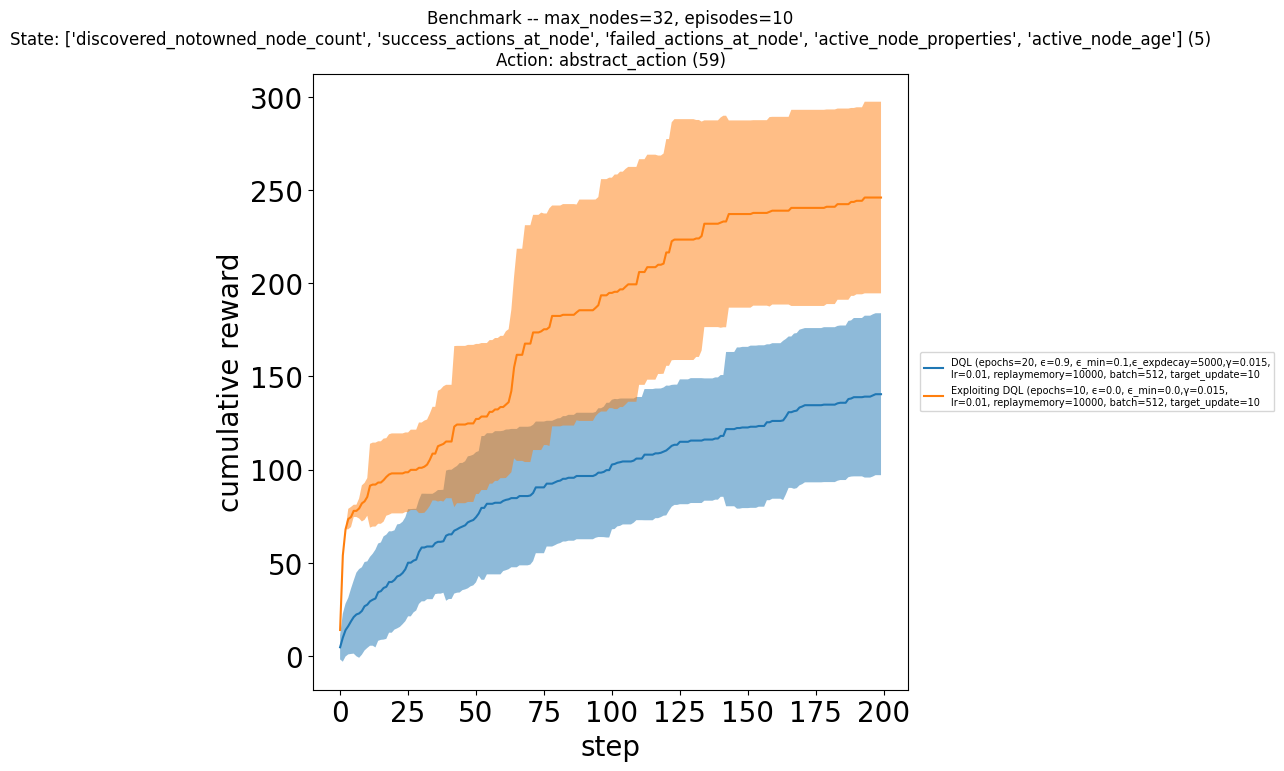

In [10]:
# Compare and plot results for all the agents
all_runs = [
    dql_run,
    dql_exploit_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

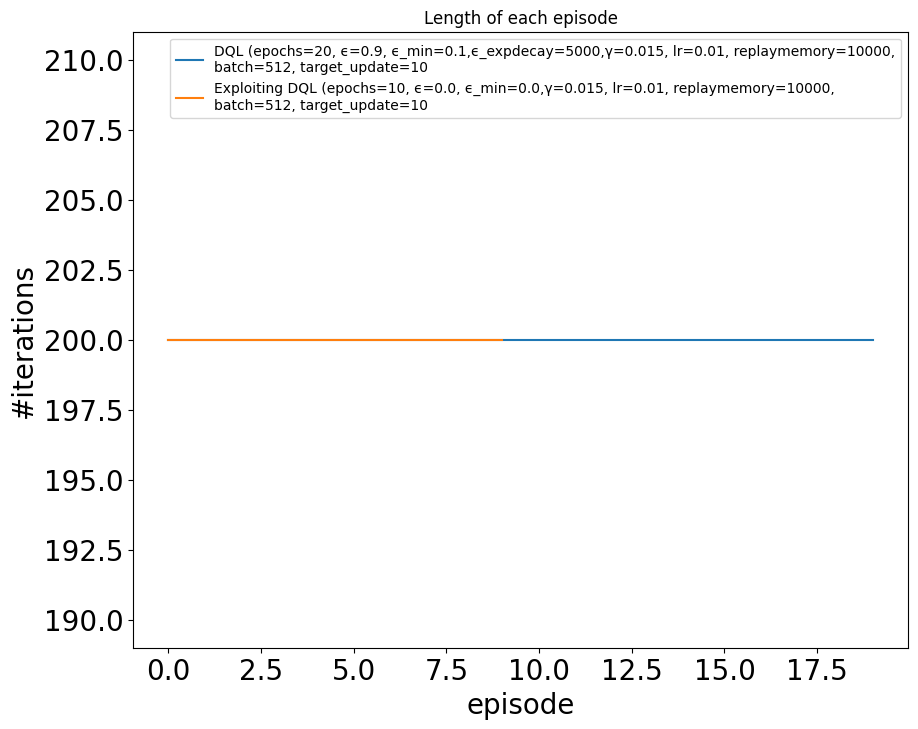

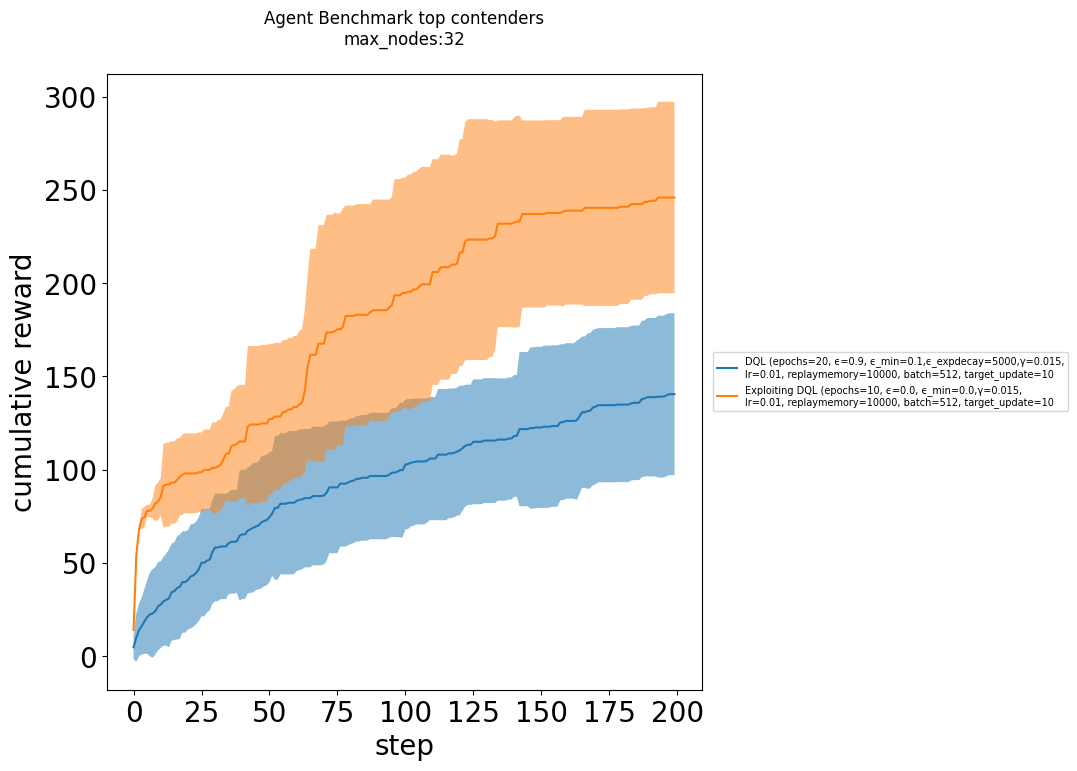

In [11]:
contenders = [dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

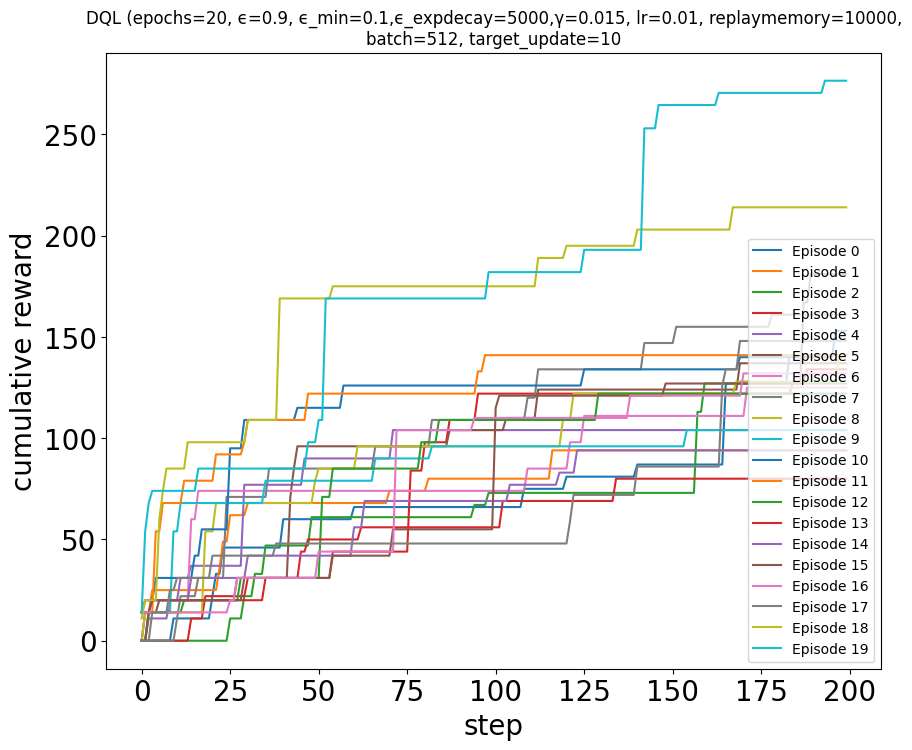

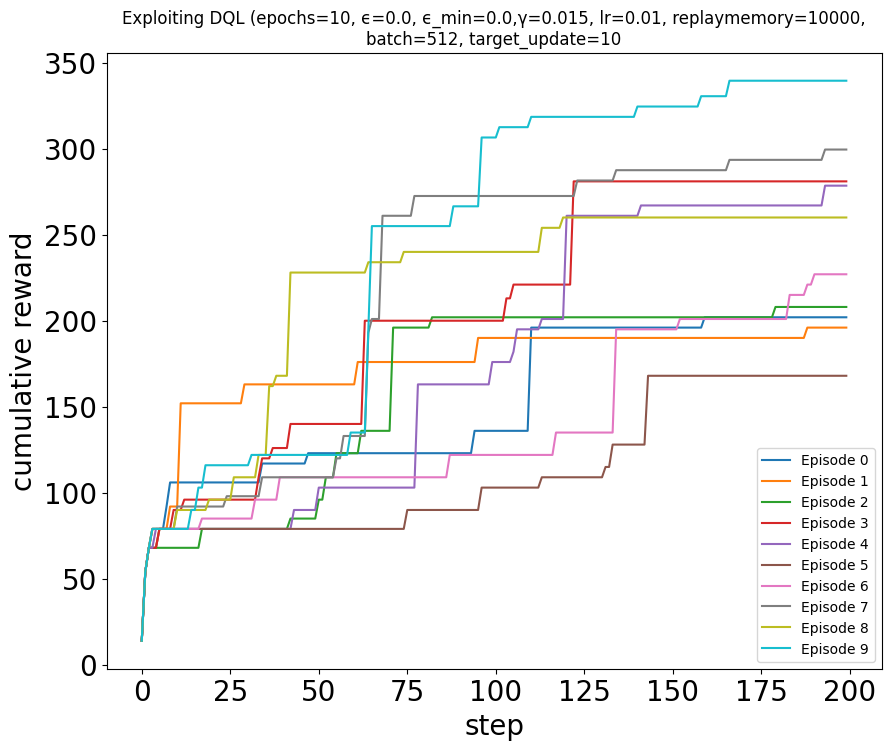

In [12]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)